# 🎬 Unsupervised learning - Movie dataset analysis 🎬

In [ ]:
# Ucitavanje bibilioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as shc
from IPython.display import HTML
from matplotlib import animation
%matplotlib inline

In [ ]:
# Ucitavanje seta podataka
df = pd.read_csv('drive/MyDrive/Datasets/movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Istrazivacka analiza podataka

In [ ]:
df.shape

(4803, 20)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [ ]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

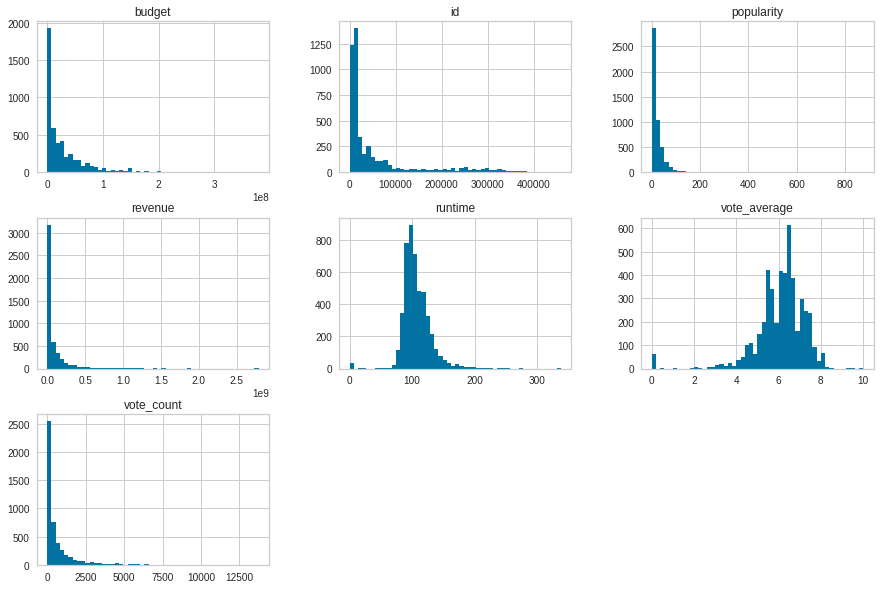

In [ ]:
df.hist(bins = 50, figsize = (15,10))
plt.show()

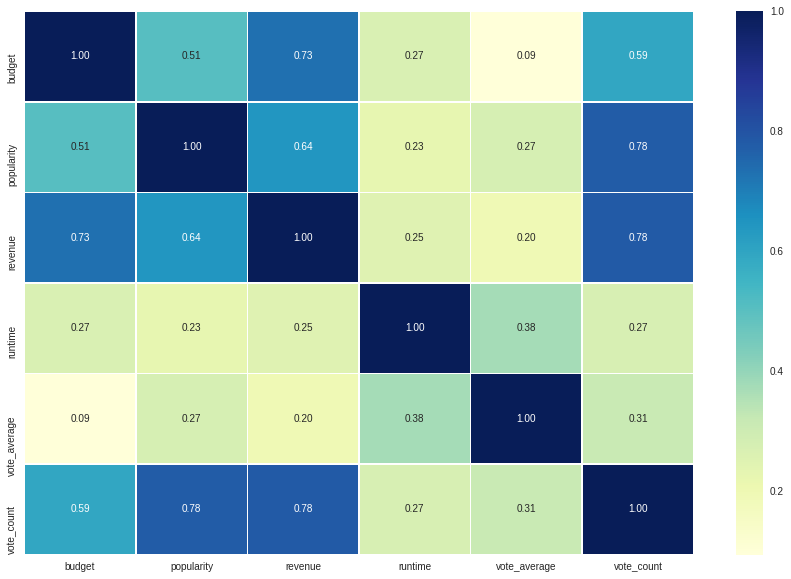

In [ ]:
corr_matrix = df.drop('id',axis=1).corr()
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap='YlGnBu')

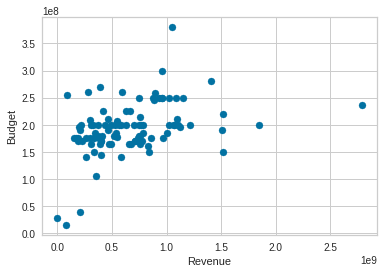

In [ ]:
plt.scatter(df['revenue'][:100], df['budget'][:100])
plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.show()

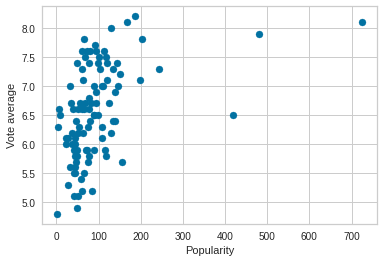

In [ ]:
plt.scatter(df['popularity'][:100], df['vote_average'][:100])
plt.xlabel("Popularity")
plt.ylabel("Vote average")
plt.show()

In [ ]:
df['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
cs       2
ta       2
ar       2
ro       2
id       2
pl       1
xx       1
af       1
tr       1
vi       1
nb       1
ps       1
el       1
sl       1
is       1
ky       1
no       1
hu       1
te       1
Name: original_language, dtype: int64

## Preprocessing data

In [ ]:
df = df.dropna(subset=['release_date', 'runtime'])

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.release_date = [int((x.split('-'))[0]) for x in df.release_date]

In [ ]:
df.release_date

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4795    1992
4796    2011
4797    2013
4798    2012
4799    2005
Name: release_date, Length: 4800, dtype: int64

In [ ]:
le = LabelEncoder()
df.original_language = le.fit_transform(df.original_language)

In [ ]:
df.original_language.value_counts()

7     4503
10      70
8       32
5       27
36      27
12      19
17      16
16      13
2       12
27      11
18      11
25       9
4        7
29       5
9        4
21       4
32       3
11       3
1        2
14       2
26       2
30       2
3        2
28       1
24       1
20       1
35       1
33       1
13       1
31       1
6        1
22       1
34       1
15       1
19       1
23       1
0        1
Name: original_language, dtype: int64

In [ ]:
X = df[['budget', 'release_date', 'popularity', 'revenue', 'vote_average', 'vote_count', 'original_language']]

In [ ]:
X

,budget,release_date,popularity,revenue,vote_average,vote_count,original_language
0,237000000,2009,150.437577,2787965087,7.2,11800,7
1,300000000,2007,139.082615,961000000,6.9,4500,7
2,245000000,2015,107.376788,880674609,6.3,4466,7
3,250000000,2012,112.312950,1084939099,7.6,9106,7
4,260000000,2012,43.926995,284139100,6.1,2124,7
...,...,...,...,...,...,...,...
4795,220000,1992,14.269792,2040920,6.6,238,8
4796,9000,2011,0.642552,0,5.9,5,7
4797,0,2013,1.444476,0,7.0,6,7
4798,0,2012,0.857008,0,5.7,7,7


In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## Modeling

In [ ]:
# K-Means
def doKmeans(X, nclust=2):
  model = KMeans(nclust)
  model.fit(X)
  clust_labels = model.predict(X)
  cent = model.cluster_centers_
  return (clust_labels, cent)

clust_labels, cent = doKmeans(X_scaled, 3)
kmeans = pd.DataFrame(clust_labels)

Text(0, 0.5, 'Revenue')

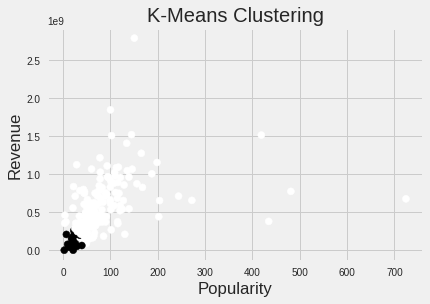

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['popularity'][:200],X['revenue'][:200],
                     c=kmeans[0][:200])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Popularity')
ax.set_ylabel('Revenue')

Text(0, 0.5, 'Vote average')

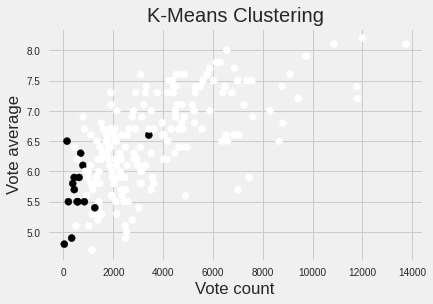

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['vote_count'][:200],X['vote_average'][:200],
                     c=kmeans[0][:200])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Vote count')
ax.set_ylabel('Vote average')

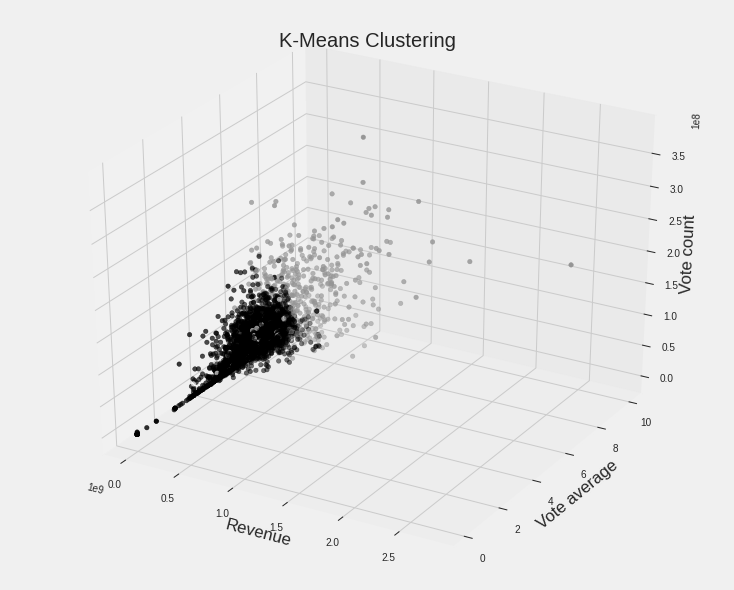

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(X['revenue'], X['vote_average'], X['budget'], c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Revenue')
ax.set_ylabel('Vote average')
ax.set_zlabel('Vote count')
plt.show()

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)

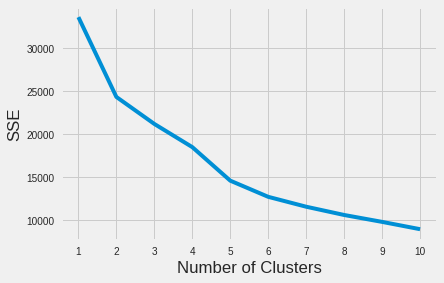

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# DBSCAN
def doDBSCAN(X):
  model = DBSCAN(n_jobs=-1, min_samples=7)
  model.fit(X)
  clust_labels2 = model.labels_
  return clust_labels2

clust_labels2 = doDBSCAN(X_scaled)
dbscan = pd.DataFrame(clust_labels2)

In [ ]:
cldf = pd.DataFrame(clust_labels2)
cldf.value_counts()

 0    3506
-1    1226
 2      55
 1       7
 3       6
dtype: int64

Text(0, 0.5, 'Vote average')

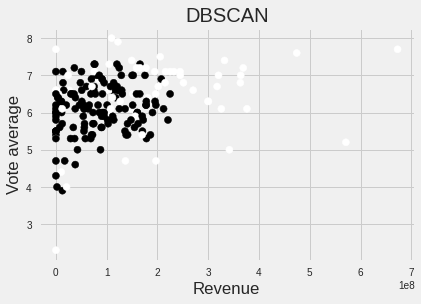

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['revenue'][1000:1200],X['vote_average'][1000:1200],
                     c=dbscan[0][1000:1200])
ax.set_title('DBSCAN')
ax.set_xlabel('Revenue')
ax.set_ylabel('Vote average')

In [ ]:
adef doGMM(X, nclust=4):
    model = GaussianMixture(n_components=nclust, init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(X_scaled,4)
gmm = pd.DataFrame(clust_labels3)

Text(0, 0.5, 'Vote average')

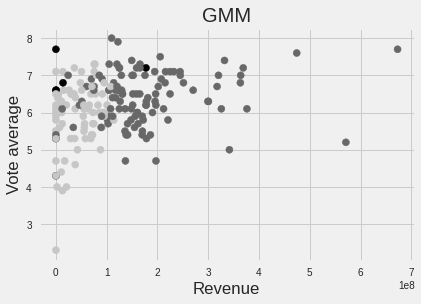

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['revenue'][1000:1200],X['vote_average'][1000:1200],
                     c=gmm[0][1000:1200])
ax.set_title('GMM')
ax.set_xlabel('Revenue')
ax.set_ylabel('Vote average')

In [ ]:
def doHierarchical(X, nclust=2):
  cluster = AgglomerativeClustering(n_clusters=nclust, affinity='euclidean', linkage='ward')
  clust_labels4 = cluster.fit_predict(X)
  return (clust_labels4)

clust_labels4 = doHierarchical(X_scaled,3)
hierc = pd.DataFrame(clust_labels4)

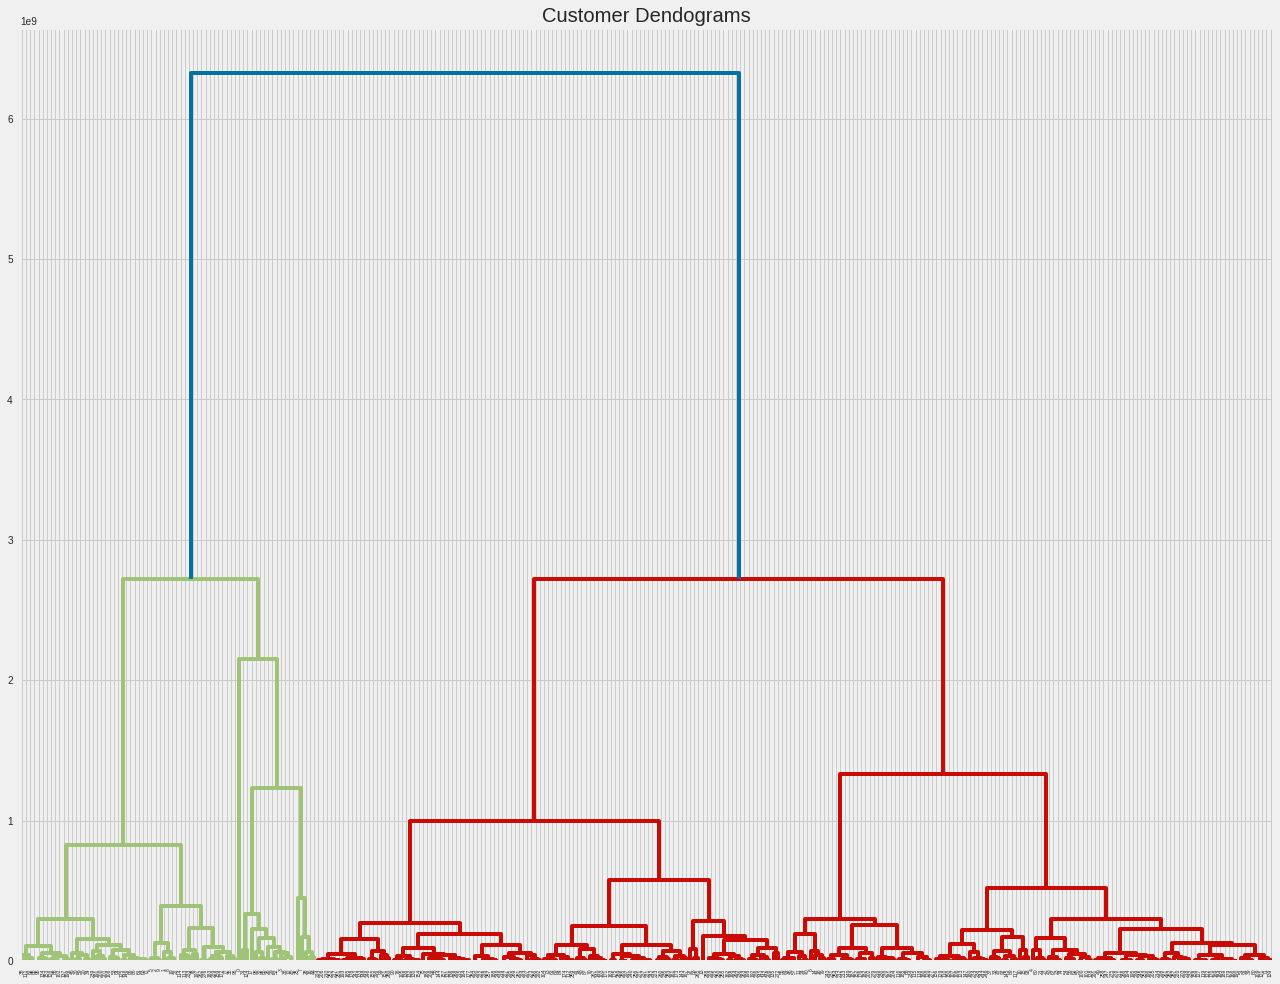

In [ ]:
data = X.iloc[:300,:].values
plt.figure(figsize=(20,16))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Text(0, 0.5, 'Vote average')

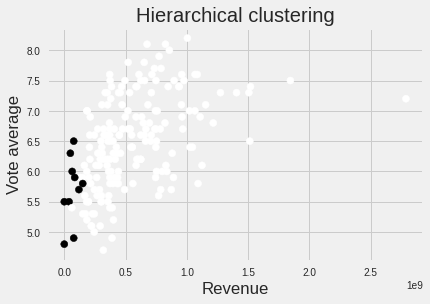

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['revenue'][:200],X['vote_average'][:200],
                     c=hierc[0][:200])
ax.set_title('Hierarchical clustering')
ax.set_xlabel('Revenue')
ax.set_ylabel('Vote average')

In [ ]:
X_scaled.shape

(4800, 7)

In [ ]:
# Implement PCA
pca = PCA(n_components=7, random_state=42)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [ ]:
X_pca.shape

(4800, 7)

In [ ]:
print("Variance explained by all 7 principal components =", sum(pca.explained_variance_ratio_*100))

Variance explained by all 7 principal components = 99.99999999999999


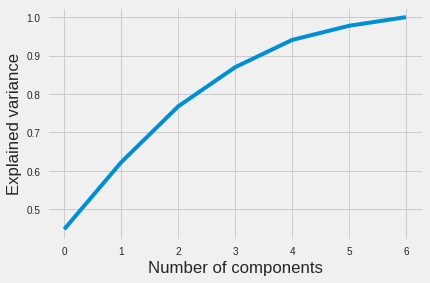

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 44.84787413,  62.25670672,  76.78194266,  86.96616074,
        94.06436316,  97.74427312, 100.        ])

In [ ]:
pca_3 = PCA(n_components=3, random_state=42)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

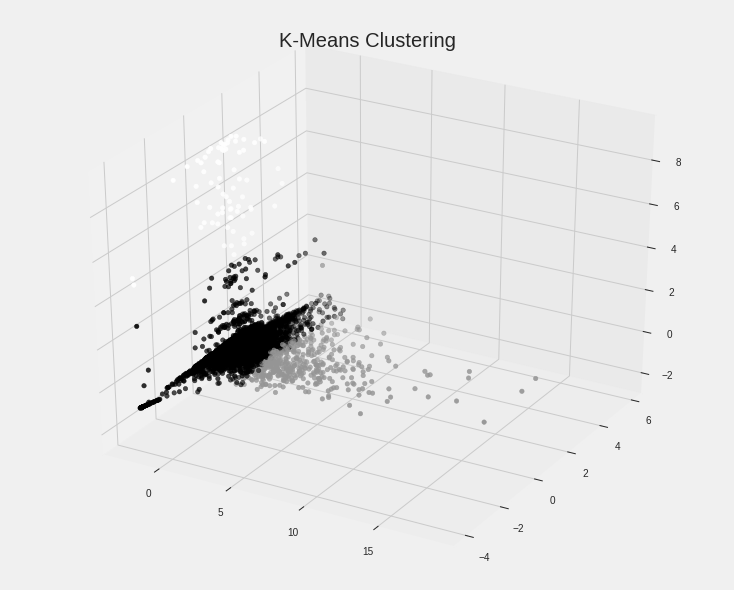

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=kmeans[0])
ax.set_title('K-Means Clustering')
plt.show()

In [ ]:
pca95 = PCA(n_components=0.94, whiten=True)
X_pca95 = pca95.fit_transform(X_scaled)
print("Original number of features:", X_scaled.shape[1]) 
print("Reduced number of features:", X_pca95.shape[1])

Original number of features: 7
Reduced number of features: 5


## Evaluation

In [ ]:
# Silhouette
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X_scaled)

print('Kmeans: {}'.format(silhouette_score(X_scaled, kmeans.labels_, 
                                           metric='euclidean')))
print('DBSCAN: {}'.format(silhouette_score(X_scaled, dbscan.labels_, 
                                           metric='cosine')))
print('Hier: {}'.format(silhouette_score(X_scaled, hier.labels_, 
                                           metric='euclidean')))

Kmeans: 0.5690388236379041
DBSCAN: -0.5081307053033534
Hier: 0.45055825871834654


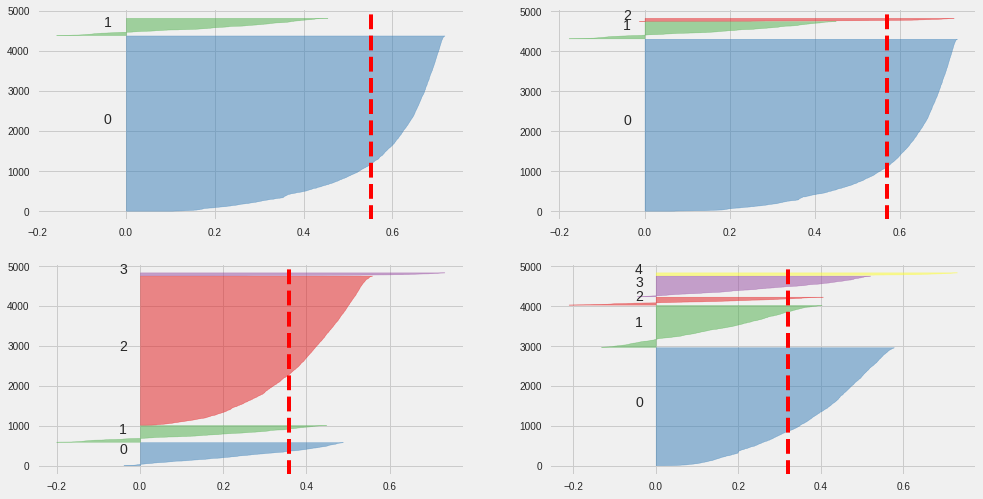

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled)

In [ ]:
km_scores = []
km_silhouette = []
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    

Score for number of cluster(s) 2: -24334.32686616848
Silhouette score for number of cluster(s) 2: 0.551142376722867
Davies Bouldin score for number of cluster(s) 2: 0.9731433688616017
Score for number of cluster(s) 3: -20352.448922513053
Silhouette score for number of cluster(s) 3: 0.5690388236379041
Davies Bouldin score for number of cluster(s) 3: 0.8279187682503405
Score for number of cluster(s) 4: -17286.243845041652
Silhouette score for number of cluster(s) 4: 0.3598075650927847
Davies Bouldin score for number of cluster(s) 4: 0.9523319610519031
Score for number of cluster(s) 5: -14613.64792237741
Silhouette score for number of cluster(s) 5: 0.3213639770413676
Davies Bouldin score for number of cluster(s) 5: 1.0315638174501902
Score for number of cluster(s) 6: -12727.537695426152
Silhouette score for number of cluster(s) 6: 0.2924701323271413
Davies Bouldin score for number of cluster(s) 6: 1.0023602481917715
Score for number of cluster(s) 7: -11336.7976972381
Silhouette score for 

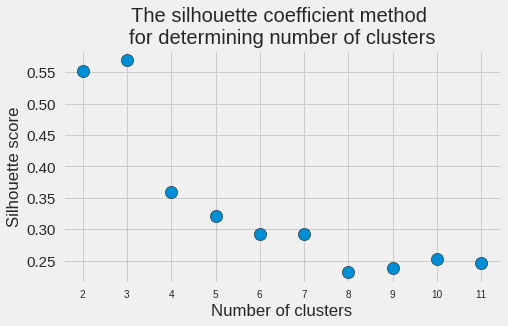

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters")
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(2,12)])
plt.yticks(fontsize=15)
plt.show()

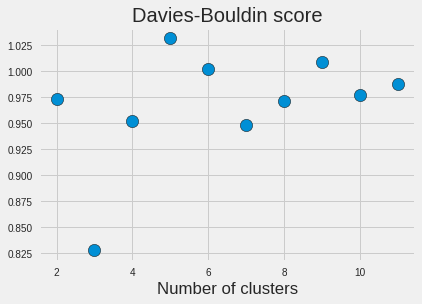

In [ ]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.title("Davies-Bouldin score")
plt.xlabel("Number of clusters")
plt.show()

## Visualization

In [ ]:
X.columns

Index(['budget', 'release_date', 'popularity', 'revenue', 'vote_average',
       'vote_count', 'original_language'],
      dtype='object')

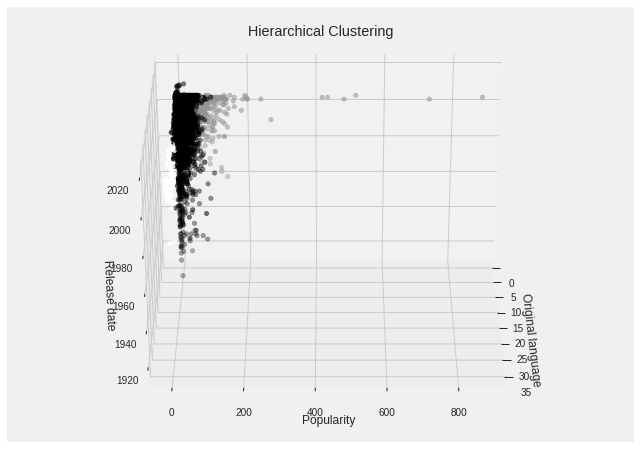

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['original_language'], X['popularity'], X['release_date'], c=kmeans[0])
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Original language')
ax.set_ylabel('Popularity')
ax.set_zlabel('Release date')

def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

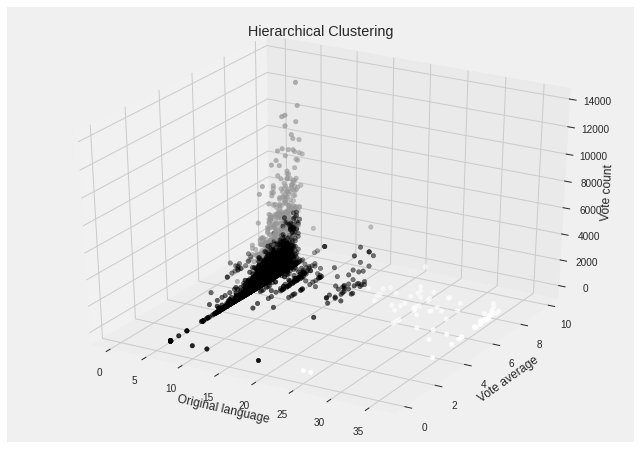

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['original_language'], X['vote_average'], X['vote_count'], c=kmeans[0])
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Original language')
ax.set_ylabel('Vote average')
ax.set_zlabel('Vote count')
plt.show()

def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())